# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import datetime as dt

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
df = pd.read_csv('marketing.csv')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [3]:
df.isnull().sum()/len(df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [4]:
df.isnull().sum()/len(df)*100
df['Income'].fillna(0, inplace=True)

In [5]:
df.isnull().sum()/len(df)*100

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Response               0.0
dtype: float64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [6]:
len(df[df.duplicated()])

0

### 5. Drop the columns which you think redundant for the analysis 

In [7]:
df=df.drop(columns=['ID','Dt_Customer'], axis=1)

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [8]:
# Checking the unique categories in Marital_Status column
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [9]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married','Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced','Widow','YOLO','Absurd','Alone'],'Single')
df['Marital_Status'].unique()

array(['Single', 'relationship'], dtype=object)

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [10]:
df['Total_Expenses']= df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+ df['MntGoldProds']
df['Total_Expenses']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Expenses, Length: 2240, dtype: int64

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [11]:
df['Num_Total_Purchases']=df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumDealsPurchases']
df['Num_Total_Purchases']

0       25
1        6
2       21
3        8
4       19
        ..
2235    18
2236    22
2237    19
2238    23
2239    11
Name: Num_Total_Purchases, Length: 2240, dtype: int64

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [12]:
df['Kids']= df['Kidhome']+df['Teenhome']
df['Kids']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Kids, Length: 2240, dtype: int64

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [13]:
df['TotalAcceptedCmp']= df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']
df['TotalAcceptedCmp']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    0
Name: TotalAcceptedCmp, Length: 2240, dtype: int64

### 11. Drop those columns which we have used above for obtaining new features

In [14]:
col_del=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumDealsPurchases','Kidhome','Teenhome','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
df=df.drop(columns=col_del, axis=1)
df.head(5)

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,7,0,1,1617,25,0,0
1,1954,Graduation,Single,46344.0,38,5,0,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,26,4,0,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,26,6,0,0,53,8,1,0
4,1981,PhD,relationship,58293.0,94,5,0,0,422,19,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [15]:
df['age']= dt.datetime.today().year-df['Year_Birth']
df['age']

0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: age, Length: 2240, dtype: int64

### 13. Encode the categorical variables in the dataset

In [16]:
cate= ['Education','Marital_Status']
lb= LabelEncoder()
for i in cate:
    df[i]= df[[i]].apply(lb.fit_transform)
df

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,1957,2,0,58138.0,58,7,0,1,1617,25,0,0,65
1,1954,2,0,46344.0,38,5,0,0,27,6,2,0,68
2,1965,2,1,71613.0,26,4,0,0,776,21,0,0,57
3,1984,2,1,26646.0,26,6,0,0,53,8,1,0,38
4,1981,4,1,58293.0,94,5,0,0,422,19,1,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,1,61223.0,46,5,0,0,1341,18,1,0,55
2236,1946,4,1,64014.0,56,7,0,0,444,22,3,1,76
2237,1981,2,0,56981.0,91,6,0,0,1241,19,0,1,41
2238,1956,3,1,69245.0,8,3,0,0,843,23,1,0,66


### 14. Standardize the columns, so that values are in a particular range

In [17]:
df1= df.copy()
scaled_features= StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)
scaled_features_df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,-0.985345,-0.350141,-1.346874,0.251939,0.307039,0.693904,-0.097282,2.388846,1.679417,1.320826,-1.264505,-0.439037,0.985345
1,-1.235733,-0.350141,-1.346874,-0.208699,-0.383664,-0.130463,-0.097282,-0.418612,-0.961275,-1.154596,1.396361,-0.439037,1.235733
2,-0.317643,-0.350141,0.742460,0.778231,-0.798086,-0.542647,-0.097282,-0.418612,0.282673,0.799685,-1.264505,-0.439037,0.317643
3,1.268149,-0.350141,0.742460,-0.978043,-0.798086,0.281720,-0.097282,-0.418612,-0.918094,-0.894025,0.065928,-0.439037,-1.268149
4,1.017761,1.428354,0.742460,0.257992,1.550305,-0.130463,-0.097282,-0.418612,-0.305254,0.539114,0.065928,-0.439037,-1.017761


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [18]:
cov_metrix = np.cov(scaled_features.T)
cov_metrix

array([[ 1.00044663e+00, -1.71466853e-01,  4.23840181e-03,
        -1.54960323e-01, -1.98799637e-02,  1.21193363e-01,
        -3.01410006e-02,  2.13347389e-02, -1.11356106e-01,
        -1.68379081e-01, -9.02395543e-02, -3.00695746e-04,
        -1.00044663e+00],
       [-1.71466853e-01,  1.00044663e+00, -1.37540339e-02,
         1.17713252e-01, -1.17336854e-02, -4.02988173e-02,
        -5.05625191e-02,  9.08600553e-02,  9.20951775e-02,
         9.40543885e-02,  5.32130438e-02,  3.53512102e-02,
         1.71466853e-01],
       [ 4.23840181e-03, -1.37540339e-02,  1.00044663e+00,
         7.33686407e-03, -4.50971948e-03,  3.44176238e-03,
        -5.20465543e-03, -1.50142261e-01, -1.77523234e-02,
         6.71036864e-03,  3.91759832e-02,  3.19398267e-05,
        -4.23840181e-03],
       [-1.54960323e-01,  1.17713252e-01,  7.33686407e-03,
         1.00044663e+00, -1.06076573e-02, -5.35690911e-01,
        -2.44995482e-02,  1.36449425e-01,  6.54445824e-01,
         5.55992837e-01, -2.93067983e

In [19]:
#Step 2 Calculating eigen values and eigen vectors
eig_vals, eig_vectors= np.linalg.eig(cov_metrix)
print('eigen values:','\n',eig_vals)
print('\n')
print('eigen vectors','\n',eig_vectors)

eigen values: 
 [ 3.33113482e+00  2.06676327e+00 -4.92745609e-16  1.33095683e+00
  1.59885828e-01  3.52356472e-01  4.84290668e-01  5.97846802e-01
  7.78318830e-01  9.04170247e-01  1.03852567e+00  9.58702688e-01
  1.00285403e+00]


eigen vectors 
 [[-1.64691102e-01 -6.42805880e-01 -7.07106781e-01 -8.14627487e-02
  -4.75523623e-03  2.43430913e-02  1.23029567e-02  5.28119028e-02
   7.57567817e-02 -1.72897869e-01 -8.03759332e-02 -8.15871120e-02
  -2.71310355e-02]
 [ 9.40187537e-02  1.84672651e-01  2.78186543e-17  2.15472910e-01
  -1.73946345e-02  2.16508314e-02 -1.13630335e-01 -9.35191372e-02
  -3.21909745e-01 -6.67416637e-01 -4.55324914e-01 -2.96333653e-01
  -2.09746597e-01]
 [-1.98845319e-02  2.60522261e-02 -1.61455683e-16 -2.83758350e-01
   7.24718916e-03  3.84744195e-03  1.85215514e-01 -8.54901310e-02
  -2.06842794e-01  1.51193585e-01 -3.98496455e-01 -2.80251102e-01
   7.57458161e-01]
 [ 4.31863603e-01 -1.51653889e-02 -2.47747416e-16 -1.48102568e-01
  -9.54169030e-02 -7.36940323e-01  1

In [20]:
#step 3: Scree Plot
total = sum(eig_vals)
var_exp= [(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print('Explained Variance: ', var_exp)
print('Cummulative Variance Explained: ', cum_var_exp)

Explained Variance:  [25.61267470108877, 15.891081564778037, 10.233558890728963, 7.98509265680063, 7.710817923458121, 7.371343813057826, 6.95205076270144, 5.984395122817314, 4.596768509222172, 3.7236497469309042, 2.709224382440554, 1.229341925975249, -3.788658720697271e-15]
Cummulative Variance Explained:  [ 25.6126747   41.50375627  51.73731516  59.72240781  67.43322574
  74.80456955  81.75662031  87.74101544  92.33778394  96.06143369
  98.77065807 100.         100.        ]


###### 8 Components are enough as per the above analysis

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [21]:
pca= PCA(n_components=8)
pca_df= pd.DataFrame(pca.fit_transform(scaled_features_df), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.252410,0.386355,1.565403,1.014931,-1.026363,-0.234252,-0.690915,0.663345
1,-1.210975,2.062292,0.559841,0.623657,-0.771960,-1.029568,-0.188241,0.235289
2,1.236529,0.079016,-0.859588,-0.210061,0.911032,-1.088524,0.058975,-0.062454
3,-2.026117,-1.442552,-0.215819,-0.482589,0.809940,-0.500774,0.192415,-0.320192
4,-0.226360,-0.755538,-1.225448,-1.044776,-0.588193,1.618081,1.069782,-0.251557


In [22]:
pca.explained_variance_ratio_

array([0.25612675, 0.15891082, 0.10233559, 0.07985093, 0.07710818,
       0.07371344, 0.06952051, 0.05984395])

In [23]:
cluster_errors=[]
cluster_range=range(2,10)
for num_clusters in cluster_range:
    clusters= KMeans(num_clusters,random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

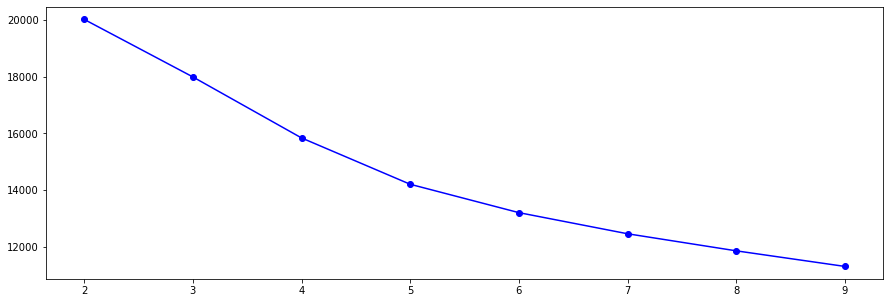

In [24]:
cluster_df=pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors':cluster_errors})

#Elbow Plot
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

In [25]:
##Applying KMeans Clustering for the optimal number of clusters obtained above
kmeans=KMeans(n_clusters=4, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=4, random_state=100)

In [26]:
label= pd.DataFrame(kmeans.labels_,columns=['Label'])

In [27]:
df['label']=label

In [28]:
df['label'].value_counts(normalize=True)*100

0    39.776786
1    31.875000
2    27.410714
3     0.937500
Name: label, dtype: float64

In [29]:
df[df['label']==2]['Income'].mean()

75607.85830618892

In [30]:
df[df['label']==1]['Income'].mean()

53713.34733893557

In [31]:
kmeans_df= pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,2.252410,0.386355,1.565403,1.014931,-1.026363,-0.234252,-0.690915,0.663345,2
1,-1.210975,2.062292,0.559841,0.623657,-0.771960,-1.029568,-0.188241,0.235289,1
2,1.236529,0.079016,-0.859588,-0.210061,0.911032,-1.088524,0.058975,-0.062454,2
3,-2.026117,-1.442552,-0.215819,-0.482589,0.809940,-0.500774,0.192415,-0.320192,0
4,-0.226360,-0.755538,-1.225448,-1.044776,-0.588193,1.618081,1.069782,-0.251557,0


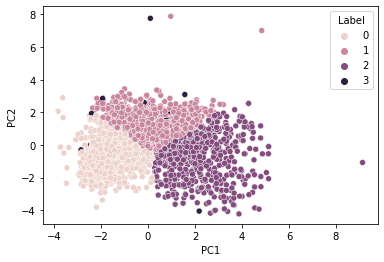

In [32]:
sns.scatterplot(kmeans_df['PC1'], kmeans_df['PC2'], hue='Label',data=kmeans_df)
plt.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

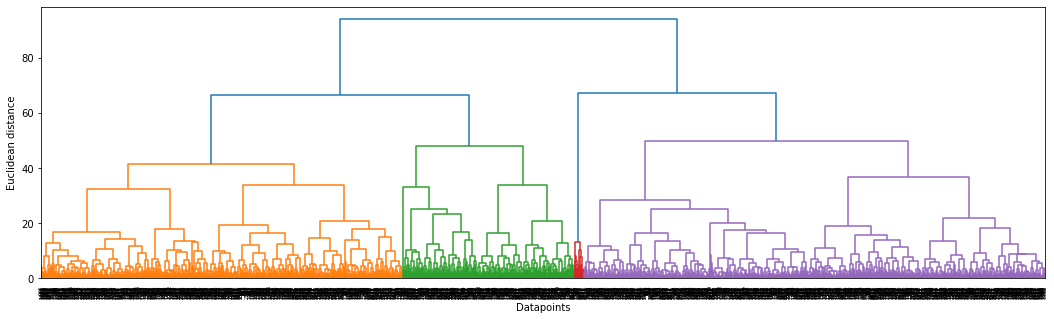

In [33]:
plt.figure(figsize=[18,5])
merg= linkage(scaled_features, method='ward')
dendrogram(merg,leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [34]:
from sklearn.metrics import silhouette_score

In [35]:
for i in range(2,15):
    hier= AgglomerativeClustering(n_clusters=i)
    hier= hier.fit(scaled_features_df)
    labels= hier.fit_predict(scaled_features_df)
    print(i, silhouette_score(scaled_features_df, labels))

2 0.15230338565232726
3 0.15835125177089243
4 0.1568091796798915
5 0.10481877183812727
6 0.11795050038968143
7 0.10750995798586115
8 0.10500562164540607
9 0.10893206102582967
10 0.1169068642456307
11 0.11830312893060727
12 0.11875825862988616
13 0.11140287586028937
14 0.10650546889995859


In [36]:
## Building Hierarchical clustering model 
hie_cluster= AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hie_cluster_model= hie_cluster.fit(scaled_features_df)

In [37]:
##creating a DataFrame of the labels
df_label1=pd.DataFrame(hie_cluster_model.labels_, columns=['Labels'])
df_label1.head(5)

,Labels
0,0
1,1
2,0
3,1
4,0


In [38]:
## joining the label dataframe with unscaled initial DataFrame
df_hier = df.join(df_label1)
df_hier.head(5)

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age,label,Labels
0,1957,2,0,58138.0,58,7,0,1,1617,25,0,0,65,2,0
1,1954,2,0,46344.0,38,5,0,0,27,6,2,0,68,1,1
2,1965,2,1,71613.0,26,4,0,0,776,21,0,0,57,2,0
3,1984,2,1,26646.0,26,6,0,0,53,8,1,0,38,0,1
4,1981,4,1,58293.0,94,5,0,0,422,19,1,0,41,0,0


### Visualization and Interpretation of results

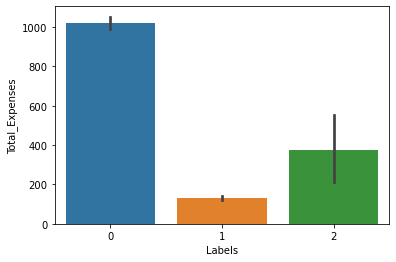

In [39]:
sns.barplot(df_hier['Labels'],df_hier['Total_Expenses'])
plt.show()

###### Total Expense is much higher for Cluster 0 as compared to cluster 1 and 2

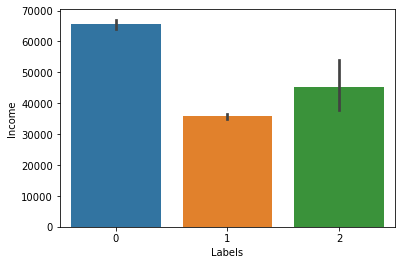

In [40]:
sns.barplot(df_hier['Labels'],df_hier['Income'])
plt.show()

###### Income for 0 cluster customer is highest followed by Cluster 2 customers

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

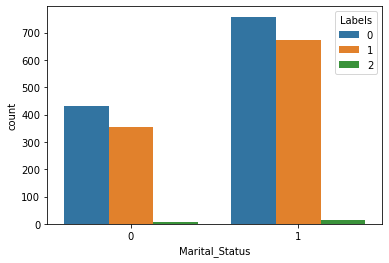

In [41]:
sns.countplot(df_hier['Marital_Status'], hue='Labels', data=df_hier)

###### People in a relationship are making more transactions

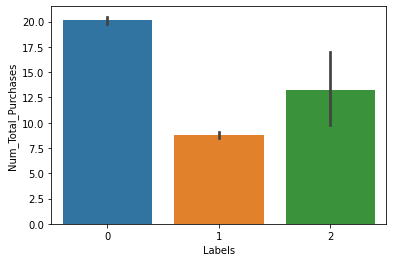

In [42]:
sns.barplot(df_hier['Labels'],df_hier['Num_Total_Purchases'])
plt.show()

###### Conclusion:
- Customers belonging to cluster 0 does maximum purchases, has spent maximum amount and have maximum income
- Where as customers belonging to cluster 1 has the least total expenses , minimum balances and does minimum purchases compared to other 2 clusters
- Customers belonging to cluster 2 does average purchanges and has average income

-----
## End of Notebook
-----